# Dimensionamento de unidade de mistura rápida com calha Parshall

- Roteiro de cálculo adaptado do Exemplo 2.2 do livro de Seckler Filho (2017). Recomenda-se a aquisição do bibliografia de referência (https://www.grupogen.com.br/tratamento-de-agua).
- Use por sua conta e risco.

**Prof. Leonardo Damasceno - leonardo.damasceno@unifal-mg.edu.br**

<span style="color:red">**ATENÇÃO!**</span>. Executar o roteiro passo a passo adotando os valores intermediários se necessário.

### Bibliotecas

In [5]:
import math
import matplotlib.pyplot as plt

### Dados de entrada

In [7]:
vazao_inicio = 150 # Vazão do início da operação em L/s.
vazao_final = 300 # Vazão do final da operação em L/s.

g = 9.81 # Aceleração da gravidade (m/s2)
mi = 1.002e-3 # Viscosidade cinemática (N.s)/m2
Ro = 998.2 # Densidade da água (kg/m^3)

<span style="color:red">**ATENÇÃO!**</span> **Escolha da calha Parshall a ser utilizada** 

Observação: a escolha deverá ser feita em função das vazões de início e de final. A vazão máxima da calha deve comportar a vazão máxima do final de operação.

<center>Tabela 1. Dimensões padronizadas da calha Parshall</center>

| W            | A     | B     | C     | D      | E      | F      | G    | K    | N    | X    | Y    | Vazão com escoamento livre (L/s) |
|--------------|-------|-------|-------|--------|--------|--------|------|------|------|------|------|----------------------------------|
| 1" - 2.5 cm  | 36.3  | 35.6  | 9.3   | 16.8   | 22.9   | 7.6    | 20.3 | 1.9  | 2.9  | -    | -    | 0.3 – 5.0                        |
| 3" - 7.6 cm  | 46.6  | 45.7  | 17.8  | 25.9   | 45.7   | 15.2   | 30.5 | 2.5  | 5.7  | 2.5  | 3.8  | 0.8 – 53.8                       |
| 6" - 15.2 cm | 61.0  | 61.0  | 39.4  | 40.3   | 61.0   | 30.5   | 61.0 | 7.6  | 11.4 | 5.1  | 7.6  | 1.4 – 110.4                      |
| 9" - 22.9 cm | 88.0  | 86.4  | 38.0  | 57.5   | 76.3   | 61.0   | 45.7 | 7.6  | 11.4 | 5.1  | 7.6  | 2.5 – 252.0                      |
| 1' - 30.5 cm | 137.2 | 134.4 | 61.0  | 84.5   | 91.5   | 61.0   | 91.5 | 7.6  | 22.9 | 5.1  | 7.6  | 3.1 – 455.9                      |
| 1 1/2' - 45.7 cm | 144.9 | 142.0 | 76.2  | 102.6  | 91.5   | 61.0   | 91.5 | 7.6  | 22.9 | 5.1  | 7.6  | 4.2 – 696.6                      |
| 2' - 61.0 cm | 152.5 | 149.6 | 91.5  | 120.7  | 91.5   | 61.0   | 91.5 | 7.6  | 22.9 | 5.1  | 7.6  | 11.9 – 937.3                     |
| 3' - 91.5 cm | 167.7 | 164.5 | 122.0 | 157.2  | 91.5   | 61.0   | 91.5 | 7.6  | 22.9 | 5.1  | 7.6  | 17.3 – 1427.2                   |
| 4' - 122.0 cm | 183.0 | 179.5 | 152.5 | 193.8  | 91.5   | 61.0   | 91.5 | 7.6  | 22.9 | 5.1  | 7.6  | 36.8 – 1922.7                   |
| 5' - 152.5 cm | 198.3 | 194.1 | 183.0 | 230.3  | 91.5   | 61.0   | 91.5 | 7.6  | 22.9 | 5.1  | 7.6  | 45.3 – 2423.9                   |
| 6' - 183.0 cm | 213.5 | 209.0 | 213.5 | 266.7  | 91.5   | 61.0   | 91.5 | 7.6  | 22.9 | 5.1  | 7.6  | 73.6 – 2930.8                   |
| 7' - 213.5 cm | 228.8 | 224.0 | 244.0 | 303.0  | 91.5   | 61.0   | 91.5 | 7.6  | 22.9 | 5.1  | 7.6  | 85.0 – 3437.7                   |
| 8' - 244.0 cm | 244.0 | 239.2 | 274.5 | 349.0  | 91.5   | 61.0   | 91.5 | 7.6  | 22.9 | 5.1  | 7.6  | 99.1 – 3950.2                   |
| 10' - 305.0 cm | 274.5 | 427.0 | 366.0 | 475.9  | 122.0  | 91.5   | 183.0 | 15.3 | 34.3 | -    | -    | 200.0 – 5660.0                  |


In [11]:
# Dimensões da calha em cm - Inserir os dados obtidos na tabela acima de acordo com a vazão de projeto
W = 30.5
C = 61
D = 84.5
G = 91.5
K = 7.6
N = 22.9

<span style="color:red">**ATENÇÃO!**</span> A partir da escolha da calha, determine os valores de **B** e **m** a partir da Tabela 2.

<center> Tabela 2. Equações de descarga em função da largura da garganta W da calha Parshall</center>

| W            | C (Q em m³/s e h₀ em m) | n     | B (Q em m³/s e h₀ em m) | m     |
|--------------|--------------------------|-------|--------------------------|-------|
| 1" - 2.5 cm  | 0.060                   | 1.550 | 6.122                   | 0.645 |
| 3" - 7.6 cm  | 0.177                   | 1.550 | 3.057                   | 0.645 |
| 6" - 15.2 cm | 0.381                   | 1.580 | 1.842                   | 0.633 |
| 9" - 22.9 cm | 0.535                   | 1.530 | 1.505                   | 0.654 |
| 1' - 30.5 cm | 0.705                   | 1.550 | 1.253                   | 0.645 |
| 1 1/2' - 45.7 cm | 1.055               | 1.538 | 0.966                   | 0.650 |
| 2' - 61.0 cm | 1.427                   | 1.550 | 0.795                   | 0.645 |
| 3' - 91.5 cm | 2.192                   | 1.570 | 0.607                   | 0.637 |
| 4' - 122.0 cm | 2.958                  | 1.580 | 0.503                   | 0.633 |
| 5' - 152.5 cm | 3.741                  | 1.590 | 0.436                   | 0.629 |
| 6' - 183.0 cm | 4.490                  | 1.590 | 0.389                   | 0.629 |
| 7' - 213.5 cm | 6.130                  | 1.610 | 0.324                   | 0.621 |
| 8' - 244.0 cm | 7.455                  | 1.600 | 0.285                   | 0.625 |
| 10' - 305.0 cm | 1.427                 | 1.550 | 6.122                   | 0.645 |

In [15]:
# Dados da equação de descarga - Inserir os dados obtidos na Tabela 2 a partir da calha escolhida (W)
B = 1.253
m = 0.645

### Função para determinação do gradiente de mistura na calha

In [17]:
def gradiente_calha(vazao, g, mi, Ro, D, W, N, K, C, G, B,m):
    h0 = B*((vazao/1000)**m)
    D_linha = ((2/3 * (D-W))+W)/100
    V0 = (vazao/1000)/(D_linha*h0)
    H0 = h0 + (V0**2)/(2*g) + N/100
    cos_teta = math.acos(-(g*vazao/1000)/((W/100)*((0.67*g*H0)**(3/2))))
    V1 = 2 * math.cos(cos_teta/3) * ((2*g*H0)/3)**(1/2)
    y1 = H0 - ((V1**2)/(2*g))
    Fr = V1/math.sqrt(g*y1)
    y2 = (y1/2) * (math.sqrt(1+(8*(Fr**2)))-1)
    yd = (y2 - (N/100) + (K/100))
    Vd = (vazao/1000)/(yd*C/100)
    delta_H = h0 + (N/100) - y2
    TDH = (G/100)/((V1+Vd)/2)
    Grad = math.sqrt((Ro*g*delta_H)/(mi*TDH))
    return h0, D_linha, V0, H0, cos_teta, V1, y1, Fr, y2, yd, Vd, delta_H, TDH, Grad

### Aplicação

In [19]:
h0, D_linha, V0, H0, cos_teta, V1, y1, Fr, y2, yd, Vd, delta_H, TDH, Grad = gradiente_calha(vazao_final, g, mi, Ro, D, W, N, K, C, G, B, m)

In [20]:
print(f"Altura na seção  de medição (h0): {h0:.2f} m.")
print(f"Largura na seção  de medição (D'): {D_linha:.2f} cm.")
print(f"Velocidade na seção  de medição (V0): {V0:.2f} m/s.")
print(f"Carga hidráulica na seção  de medição (H0): {H0:.2f} m.")
print(f"Ângulo Teta: {cos_teta:.2f} graus.")
print(f"Velocidade no início do ressalto hidráulico (V1): {V1:.2f} m/s.")
print(f"Profundidade no início do ressalto hidráulico (V1): {y1:.2f} m.")
print(f"Número de Froude (Fr): {Fr:.2f}")
print(f"Profundidade conjugada no ressalto hidráulico (y2): {y2:.2f} m.")
print(f"Profundidade da lâmina líquida (yd): {yd:.2f} m.")
print(f"Velocidade no trecho divergente (Vd): {Vd:.2f} m/s.")
print(f"Energia dissipada (Delta H): {delta_H:.2f} m.")
print(f"Tempo de detenção hidráulica (TDH): {TDH:.2f} s.")
print(f"Gradiente (Grad): {Grad:.2f} 1/s.")


Altura na seção  de medição (h0): 0.58 m.
Largura na seção  de medição (D'): 0.67 cm.
Velocidade na seção  de medição (V0): 0.78 m/s.
Carga hidráulica na seção  de medição (H0): 0.84 m.
Ângulo Teta: 2.42 graus.
Velocidade no início do ressalto hidráulico (V1): 3.24 m/s.
Profundidade no início do ressalto hidráulico (V1): 0.30 m.
Número de Froude (Fr): 1.89
Profundidade conjugada no ressalto hidráulico (y2): 0.67 m.
Profundidade da lâmina líquida (yd): 0.51 m.
Velocidade no trecho divergente (Vd): 0.96 m/s.
Energia dissipada (Delta H): 0.14 m.
Tempo de detenção hidráulica (TDH): 0.44 s.
Gradiente (Grad): 1764.24 1/s.


### Gráfico de gradiente em função da vazão inicial e final de operação

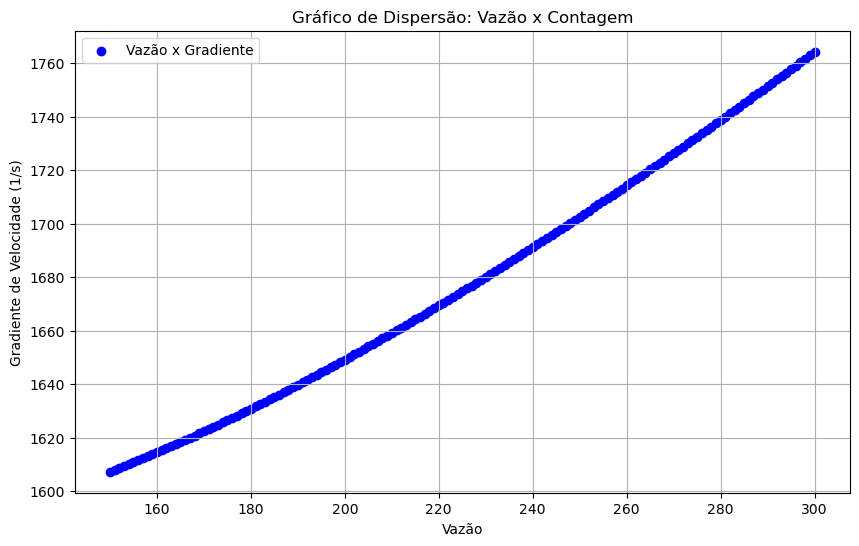

In [22]:
# Criando listas para armazenar os dados
vazoes = []
gradientes = []

for vazao in range(vazao_inicio, vazao_final+1):
    h0, D_linha, V0, H0, cos_teta, V1, y1, Fr, y2, yd, Vd, delta_H, TDH, Grad = gradiente_calha(vazao, g, mi, Ro, D, W, N, K, C, G, B, m)
    
    # Adicionando os valores às listas
    vazoes.append(vazao)
    gradientes.append(Grad)

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(vazoes, gradientes, color='blue', label='Vazão x Gradiente')
plt.title('Gráfico de Dispersão: Vazão x Contagem')
plt.xlabel('Vazão')
plt.ylabel('Gradiente de Velocidade (1/s)')
plt.legend()
plt.grid(True)
plt.show()

### Fim do roteiro
**https://github.com/lnrddev/**